In [75]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# Read in Data and view it: this dataframe will be updated to a new complete one made in SQL
Cause_df = pd.read_csv("../raw_data/merge_tables_output.csv")
Cause_df.head()

,index,Entity,Code,Year,Age_Group,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self
0,0,Afghanistan,AFG,1990,Under 5,431,808,10,776,21,0,0
1,1,Afghanistan,AFG,1991,Under 5,439,800,12,748,41,0,0
2,2,Afghanistan,AFG,1992,Under 5,486,863,13,777,51,0,0
3,3,Afghanistan,AFG,1993,Under 5,549,979,16,872,24,0,0
4,4,Afghanistan,AFG,1994,Under 5,589,1064,19,961,52,0,0


In [45]:
pop_df.head()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,12412311,13299016,14485543,15816601,17075728,18110662,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835428
1,"Population, total",SP.POP.TOTL,Albania,ALB,3286542,3266790,3247039,3227287,3207536,3187784,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
2,"Population, total",SP.POP.TOTL,Algeria,DZA,25758872,26400468,27028330,27635517,28213777,28757788,...,37383899,38140135,38923688,39728020,40551398,41389174,42228415,43053054,43851043,44616626
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,47351,48682,49900,51025,52099,53158,...,55669,55717,55791,55806,55739,55617,55461,55312,55197,55103
4,"Population, total",SP.POP.TOTL,Andorra,AND,54508,56666,58882,60974,62676,63860,...,82427,80770,79213,77993,77295,76997,77008,77146,77265,77354


<AxesSubplot:>

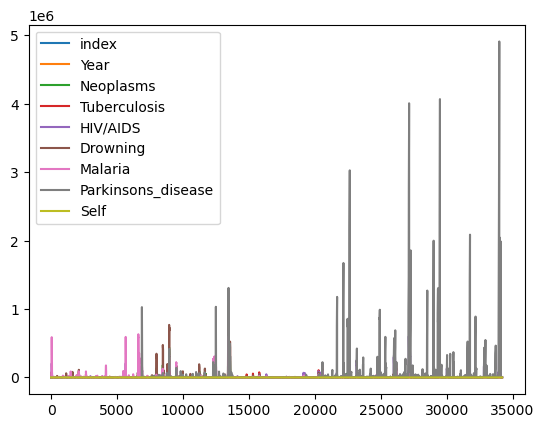

In [46]:
# Attempt to plot
Cause_df.plot()

In [47]:
# Encode Labels for SciKit Learn
le = LabelEncoder()
df2=Cause_df.copy()
df2["Entity"] = le.fit_transform(df2["Entity"])
df2["Code"] = le.fit_transform(df2["Code"])
# View Results (Bottom Half)
df2.tail()

,index,Entity,Code,Year,Age_Group,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self
34195,6835,227,204,2015,70,226,44,2073,458,28,3488,0
34196,6836,227,204,2016,70,229,45,2027,454,26,3573,0
34197,6837,227,204,2017,70,230,45,1985,437,28,3654,0
34198,6838,227,204,2018,70,229,46,1952,416,28,3748,0
34199,6839,227,204,2019,70,222,47,1930,408,29,3843,0


In [48]:
# "Encode Age_Group to binary numbers"
df2_binary_encoded = pd.get_dummies(df2, columns=["Age_Group"])
df2_binary_encoded.head()


,index,Entity,Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5
0,0,0,0,1990,431,808,10,776,21,0,0,0,0,0,0,1
1,1,0,0,1991,439,800,12,748,41,0,0,0,0,0,0,1
2,2,0,0,1992,486,863,13,777,51,0,0,0,0,0,0,1
3,3,0,0,1993,549,979,16,872,24,0,0,0,0,0,0,1
4,4,0,0,1994,589,1064,19,961,52,0,0,0,0,0,0,1


In [49]:
# Begin Scaling Process
data_scaler = StandardScaler()
df2_scaled = data_scaler.fit_transform(df2_binary_encoded)
df2_scaled

array([[-1.7317976 , -1.72447068, -1.75289789, ..., -0.5       ,
        -0.5       ,  2.        ],
       [-1.73129115, -1.72447068, -1.75289789, ..., -0.5       ,
        -0.5       ,  2.        ],
       [-1.73078471, -1.72447068, -1.75289789, ..., -0.5       ,
        -0.5       ,  2.        ],
       ...,
       [ 1.73078471,  1.72447068,  1.42879135, ..., -0.5       ,
         2.        , -0.5       ],
       [ 1.73129115,  1.72447068,  1.42879135, ..., -0.5       ,
         2.        , -0.5       ],
       [ 1.7317976 ,  1.72447068,  1.42879135, ..., -0.5       ,
         2.        , -0.5       ]])

In [ ]:
# Verify Means and Standard Deviations of each Column
for loop in df2_scaled:
    for y in loop:
        print(np.mean(df2_scaled[:,]))
        print(np.std(df2_scaled[:,]))


    
    

In [50]:
#Double Check random Column Mean/STD
print(np.mean(df2_scaled[:,7]))
print(np.std(df2_scaled[:,7]))
    

-2.49313240617579e-18
1.0


In [58]:
df2_binary_encoded['Max']=df2_binary_encoded[['Neoplasms','Tuberculosis','HIV/AIDS','Drowning','Malaria','Parkinsons_disease','Self']].apply(np.max,axis=1)
df2_binary_encoded.head()

,index,Entity,Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5,Max
0,0,0,0,1990,431,808,10,776,21,0,0,0,0,0,0,1,808
1,1,0,0,1991,439,800,12,748,41,0,0,0,0,0,0,1,800
2,2,0,0,1992,486,863,13,777,51,0,0,0,0,0,0,1,863
3,3,0,0,1993,549,979,16,872,24,0,0,0,0,0,0,1,979
4,4,0,0,1994,589,1064,19,961,52,0,0,0,0,0,0,1,1064


In [62]:
X=df2_binary_encoded.copy()
X = X.drop("Max", axis=1)
X.head()

,index,Entity,Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5
0,0,0,0,1990,431,808,10,776,21,0,0,0,0,0,0,1
1,1,0,0,1991,439,800,12,748,41,0,0,0,0,0,0,1
2,2,0,0,1992,486,863,13,777,51,0,0,0,0,0,0,1
3,3,0,0,1993,549,979,16,872,24,0,0,0,0,0,0,1
4,4,0,0,1994,589,1064,19,961,52,0,0,0,0,0,0,1


In [66]:
y = df2_binary_encoded["Max"].values
y[:5]

array([ 808,  800,  863,  979, 1064], dtype=int64)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25650, 16)
(8550, 16)
(25650,)
(8550,)


In [69]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(27360, 16)
(6840, 16)
(27360,)
(6840,)


In [73]:
scaler=StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)